In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np

In [ ]:
# Definir las rutas a los archivos Excel
file_paths = {
    "Q1": "/Users/antonio/Desktop/matriz_Q1.xlsx",
    "Q2": "/Users/antonio/Desktop/matriz_Q2.xlsx",
    "Q3": "/Users/antonio/Desktop/matriz_Q3.xlsx",
    "Q4": "/Users/antonio/Desktop/matriz_Q4.xlsx",
    "Q5": "/Users/antonio/Desktop/matriz_Q5.xlsx"
}

# Diccionarios para almacenar datos
adjacency_dfs = {}
graphs = {}
metrics = {}

# Cada capa
for layer_key, path in file_paths.items():
    # Leer la matriz de adyacencia desde el archivo Excel
    df = pd.read_excel(path, index_col=0)
    adjacency_dfs[layer_key] = df.copy()
    
    # Crear un grafo dirigido
    G = nx.DiGraph()
    tickers = list(df.index)
    G.add_nodes_from(tickers)
    
    # Añadir aristas con pesos
    for src in df.index:
        for tgt in df.columns:
            w = df.loc[src, tgt]
            if w != 0:
                G.add_edge(src, tgt, weight=w)
    graphs[layer_key] = G
    
    # Calcular out-strength usando pesos absolutos
    out_strength = {node: sum(abs(data['weight']) for _, _, data in G.out_edges(node, data=True)) for node in G.nodes()}
    
    # Almacenar métricas
    metrics[layer_key] = {
        'out_strength': out_strength
    }

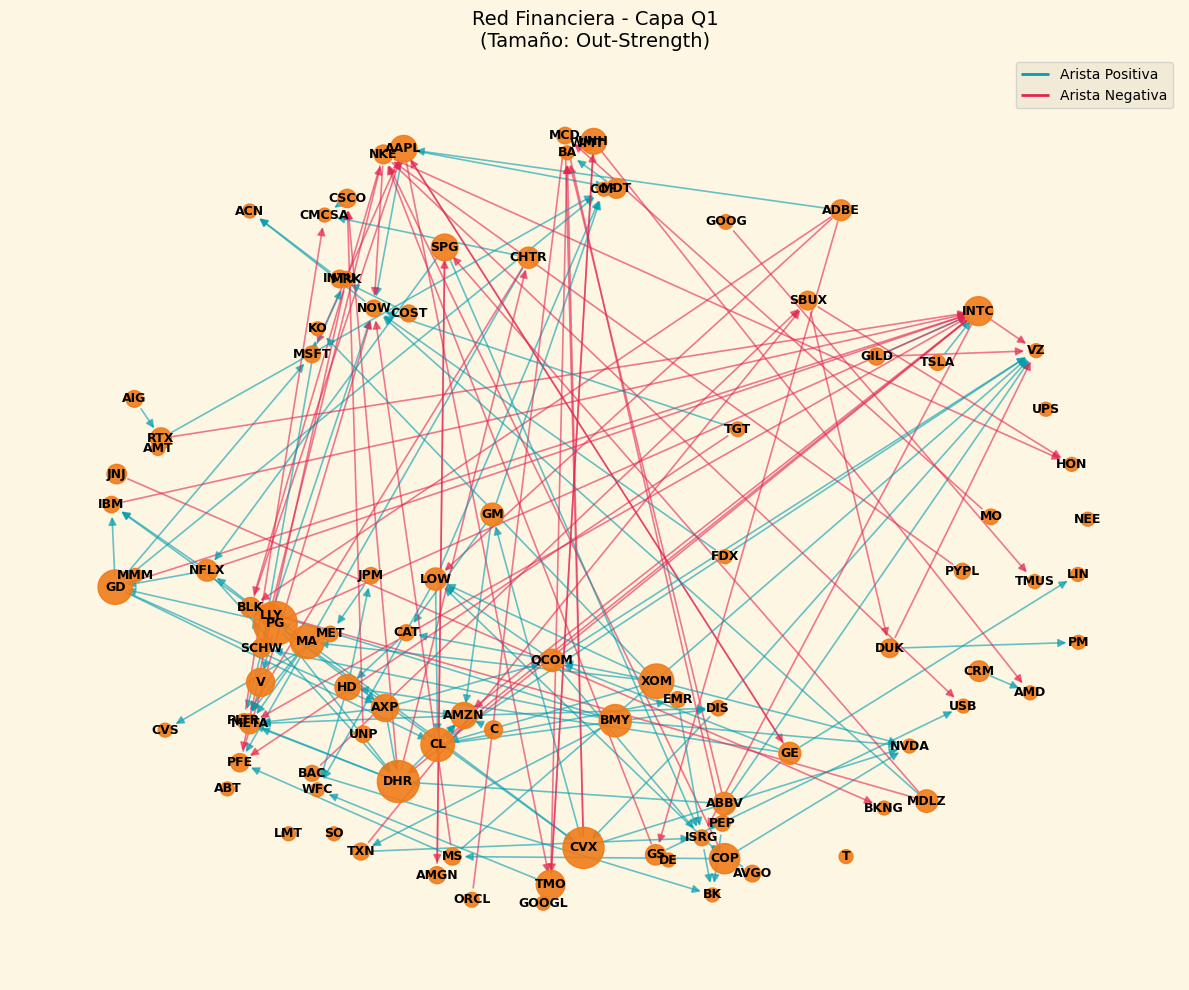

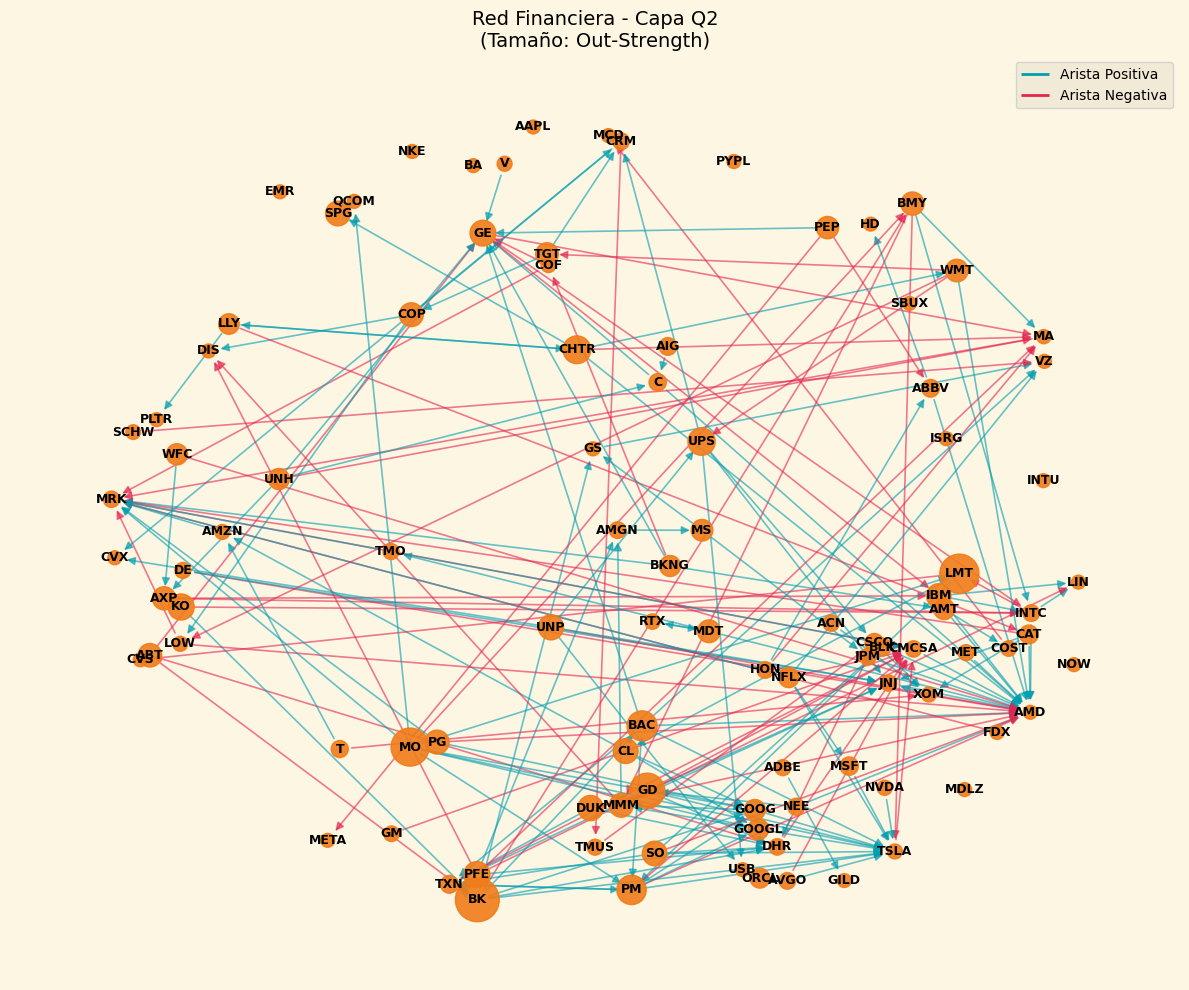

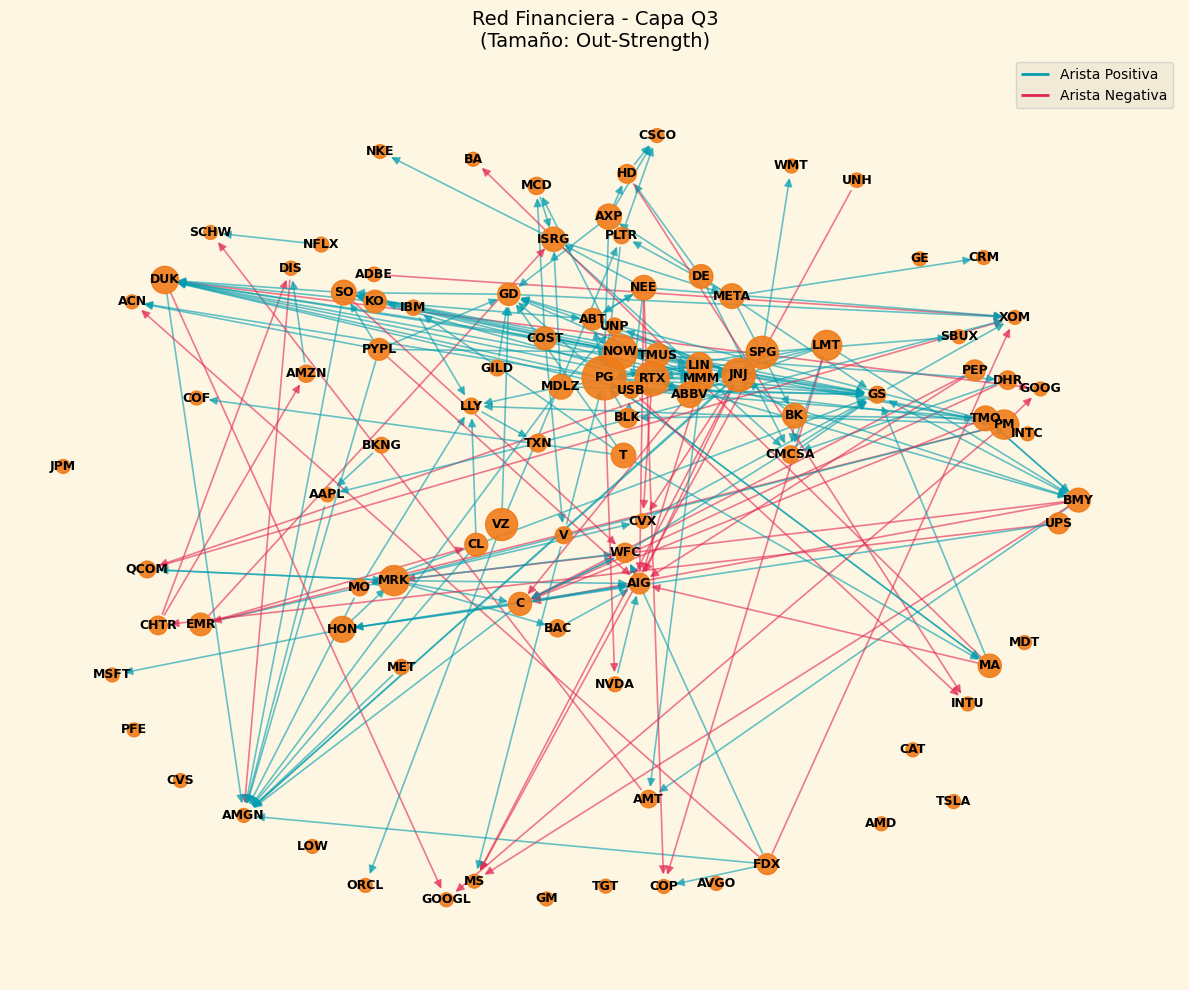

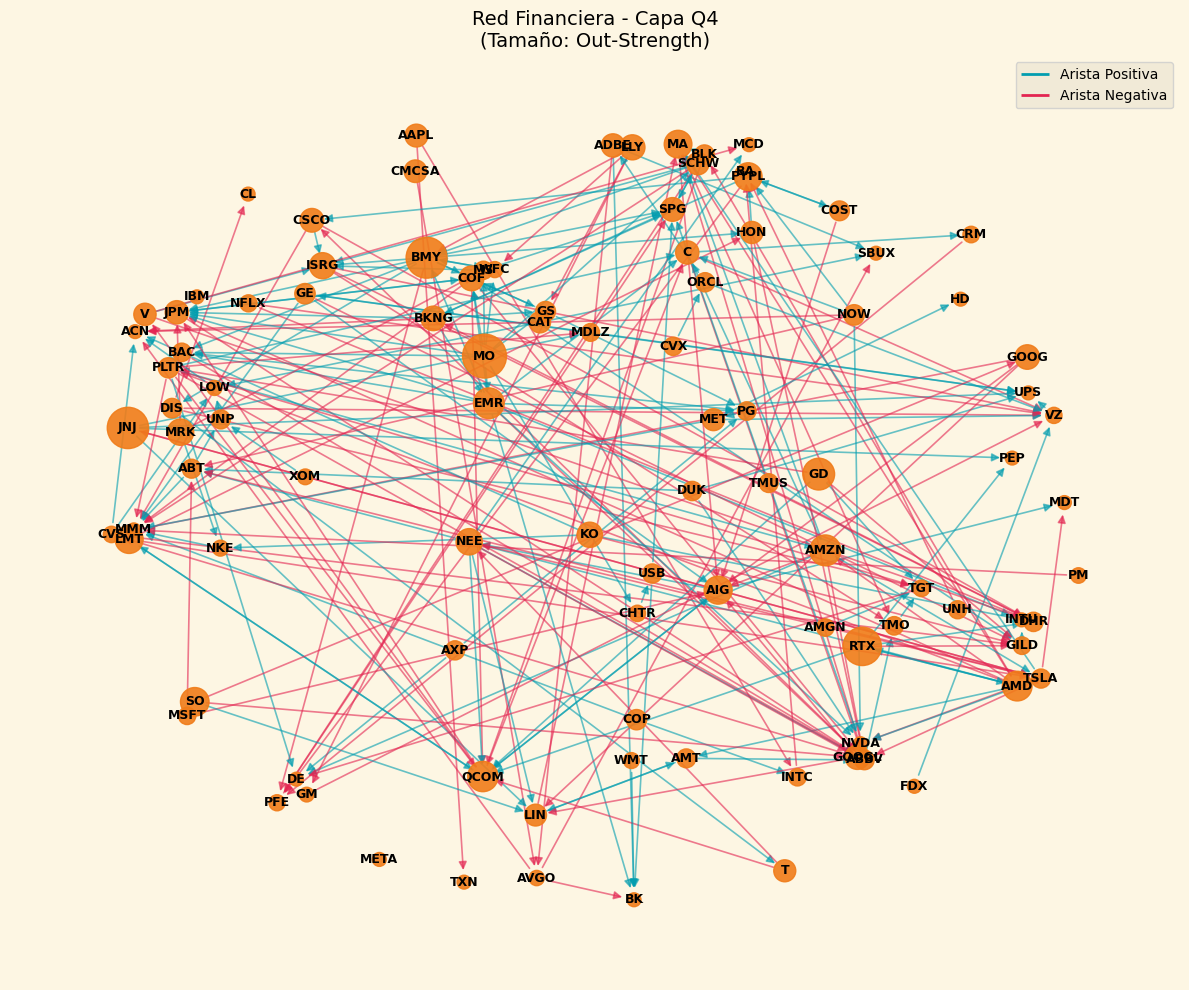

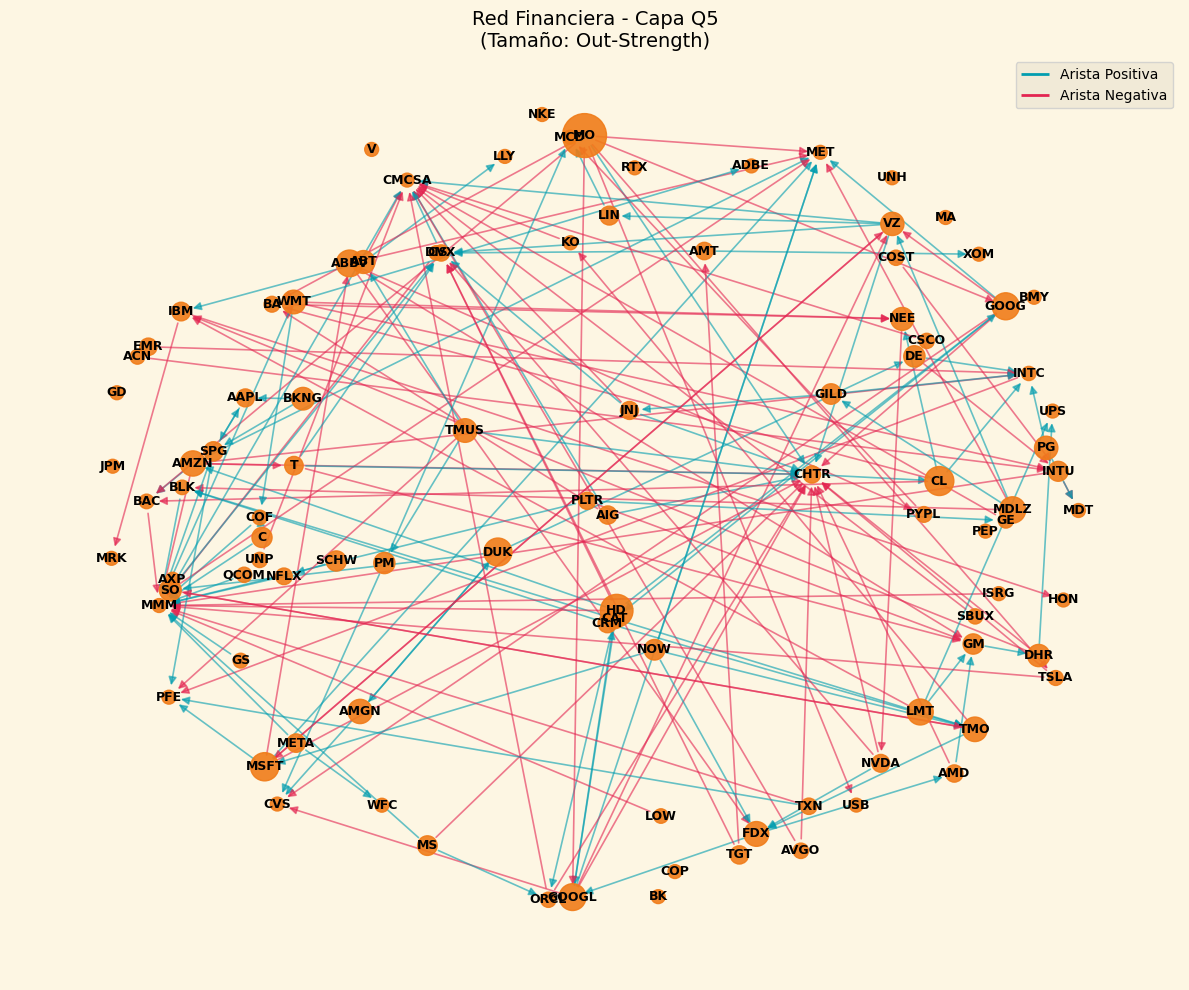

In [ ]:

plt.style.use('Solarize_Light2')

# Colores 
positive_edge_color = '#029daf'  # Verde
negative_edge_color = '#e32551'  # Rojo
node_color = '#f07c19'           # Color de nodos

# Visualizar cada capa
for layer_key, G in graphs.items():
    # Métricas
    out_strength = metrics[layer_key]['out_strength']
    out_strength_values = list(out_strength.values())
    
    # Normalizar tamaños de nodos según out-strength
    min_out = min(out_strength_values)
    max_out = max(out_strength_values)
    if max_out > min_out:
        sizes = [100 + 900 * (s - min_out) / (max_out - min_out) for s in out_strength_values]
    else:
        sizes = [500] * len(out_strength_values)
    
    # Colores de aristas según el signo del peso
    edge_colors = [positive_edge_color if G[u][v]['weight'] > 0 else negative_edge_color for u, v in G.edges()]
    
    # Crear la figura
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, seed=42, k=0.15)  # Posición de los nodos
    
    # Fondo que kiere el Danis
    ax = plt.gca()
    ax.set_facecolor('#ffffe0')  # Fondo amarillo claro
    
    # Dibujar nodos con el color 
    nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=sizes, alpha=0.9)
    
    # Dibujar aristas sin mostrar pesos
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrowstyle='-|>', arrowsize=12, width=1.2, alpha=0.6)
    
    # Añadir etiquetas a los nodos
    nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')
    
    # Leyenda para las aristas con los nuevos colores
    plt.plot([], [], color=positive_edge_color, label='Arista Positiva', linewidth=2)
    plt.plot([], [], color=negative_edge_color, label='Arista Negativa', linewidth=2)
    plt.legend(loc='best', fontsize=10)
    
    # Título
    plt.title(f"Red Financiera - Capa {layer_key}\n(Tamaño: Out-Strength)", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# Cada capa
layer_metrics = {}

for layer_key, G in graphs.items():
    # Calcular in-grado, out-grado y grado total para cada nodo
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    total_degrees = {node: in_degrees[node] + out_degrees[node] for node in G.nodes()}
    
    # Calcular medias de cada capa para loas metricas indivuales
    mean_in_degree = np.mean(list(in_degrees.values()))
    mean_out_degree = np.mean(list(out_degrees.values()))
    mean_total_degree = np.mean(list(total_degrees.values()))
    
    # Calcular densidad 
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    if num_nodes > 1:
        density = num_edges / (num_nodes * (num_nodes - 1))
    else:
        density = 0.0
    
    # Calcular coeficiente de clustering 
    UG = G.to_undirected()
    clustering_coeff = nx.average_clustering(UG)
    
    # Almacenar métricas
    layer_metrics[layer_key] = {
        'mean_in_degree': mean_in_degree,
        'mean_out_degree': mean_out_degree,
        'mean_total_degree': mean_total_degree,
        'density': density,
        'clustering_coefficient': clustering_coeff
    }
    
    # Imprimir métricas para la capa actual
    print(f"\nMétricas para capa {layer_key}:")
    print(f"  - Media del in-grado: {mean_in_degree:.4f}")
    print(f"  - Media del out-grado: {mean_out_degree:.4f}")
    print(f"  - Media del grado total: {mean_total_degree:.4f}")
    print(f"  - Densidad (superposición): {density:.4f}")
    print(f"  - Coeficiente de clustering: {clustering_coeff:.4f}")


Métricas para capa Q1:
  - Media del in-grado: 1.6700
  - Media del out-grado: 1.6700
  - Media del grado total: 3.3400
  - Densidad (superposición): 0.0169
  - Coeficiente de clustering: 0.1064

Métricas para capa Q2:
  - Media del in-grado: 1.9000
  - Media del out-grado: 1.9000
  - Media del grado total: 3.8000
  - Densidad (superposición): 0.0192
  - Coeficiente de clustering: 0.1302

Métricas para capa Q3:
  - Media del in-grado: 2.0800
  - Media del out-grado: 2.0800
  - Media del grado total: 4.1600
  - Densidad (superposición): 0.0210
  - Coeficiente de clustering: 0.1199

Métricas para capa Q4:
  - Media del in-grado: 2.4100
  - Media del out-grado: 2.4100
  - Media del grado total: 4.8200
  - Densidad (superposición): 0.0243
  - Coeficiente de clustering: 0.1076

Métricas para capa Q5:
  - Media del in-grado: 1.7400
  - Media del out-grado: 1.7400
  - Media del grado total: 3.4800
  - Densidad (superposición): 0.0176
  - Coeficiente de clustering: 0.0915


In [ ]:
from tabulate import tabulate

table_data = []
headers = ["Densidad", "Clustering"]

for layer_key, metrics in layer_metrics.items():
    row = [
        layer_key,
        f"{metrics['density']:.4f}",
        f"{metrics['clustering_coefficient']:.4f}"
    ]
    table_data.append(row)

# Imprimir la tabla en formato de cuadrícula
print(tabulate(table_data, headers=headers, tablefmt="grid"))

+----+------------+--------------+
|    |   Densidad |   Clustering |
+====+============+==============+
| Q1 |     0.0169 |       0.1064 |
+----+------------+--------------+
| Q2 |     0.0192 |       0.1302 |
+----+------------+--------------+
| Q3 |     0.021  |       0.1199 |
+----+------------+--------------+
| Q4 |     0.0243 |       0.1076 |
+----+------------+--------------+
| Q5 |     0.0176 |       0.0915 |
+----+------------+--------------+


In [ ]:


for layer_key, G in graphs.items():

    out_strength = {node: sum(abs(G[node][v]['weight']) for v in G.successors(node)) for node in G.nodes()}
    

    in_strength = {node: sum(abs(G[u][node]['weight']) for u in G.predecessors(node)) for node in G.nodes()}
    

    weight_inv = {(u, v): 1 / abs(G[u][v]['weight']) for u, v in G.edges()}
    

    nx.set_edge_attributes(G, weight_inv, "inv_weight")
    

    betweenness = nx.betweenness_centrality(G, weight="inv_weight", normalized=True)
    
  
    top_influencers = sorted(out_strength, key=out_strength.get, reverse=True)[:3]
    

    top_vulnerables = sorted(in_strength, key=in_strength.get, reverse=True)[:3]
    

    top_porteros = sorted(betweenness, key=betweenness.get, reverse=True)[:3]
    
    # Imprimir resultados para cada la capa
    print(f"\nCapa {layer_key}:")
    print("Top 3 influencers (mayor ex grado):")
    for node in top_influencers:
        print(f"  - {node}: out-strength = {out_strength[node]:.4f}")
    
    print("Top 3 vulnerables (mayor in grado):")
    for node in top_vulnerables:
        print(f"  - {node}: in-strength = {in_strength[node]:.4f}")
    
    print("Top 3 porteros (mayor centralidad de intermediación):")
    for node in top_porteros:
        print(f"  - {node}: betweenness = {betweenness[node]:.4f}")


Capa Q1:
Top 3 influencers (mayor ex grado):
  - PG: out-strength = 11.9427
  - DHR: out-strength = 10.7801
  - CVX: out-strength = 10.2746
Top 3 vulnerables (mayor in grado):
  - META: in-strength = 15.1132
  - NVDA: in-strength = 13.7344
  - PLTR: in-strength = 12.4033
Top 3 porteros (mayor centralidad de intermediación):
  - DIS: betweenness = 0.0335
  - CVX: betweenness = 0.0332
  - AAPL: betweenness = 0.0311

Capa Q2:
Top 3 influencers (mayor ex grado):
  - BK: out-strength = 11.3191
  - LMT: out-strength = 8.7445
  - MO: out-strength = 8.1870
Top 3 vulnerables (mayor in grado):
  - TXN: in-strength = 11.8155
  - TSLA: in-strength = 10.3104
  - INTC: in-strength = 8.4665
Top 3 porteros (mayor centralidad de intermediación):
  - INTC: betweenness = 0.0249
  - LMT: betweenness = 0.0248
  - GOOG: betweenness = 0.0204

Capa Q3:
Top 3 influencers (mayor ex grado):
  - PG: out-strength = 10.2979
  - RTX: out-strength = 5.7982
  - NOW: out-strength = 5.7905
Top 3 vulnerables (mayor in g

In [ ]:
# Almacenamos datos en
table_data = []
headers = ["Capa", "Categoría", "Nodo 1", "Valor 1", "Nodo 2", "Valor 2", "Nodo 3", "Valor 3"]

for layer_key, G in graphs.items():
    # Calcular out-strength 
    out_strength = {node: sum(abs(G[node][v]['weight']) for v in G.successors(node)) for node in G.nodes()}
    
    # Calcular in-strength 
    in_strength = {node: sum(abs(G[u][node]['weight']) for u in G.predecessors(node)) for node in G.nodes()}
    
    # Calcular pesos para la centralidad de intermediación
    weight_inv = {(u, v): 1 / abs(G[u][v]['weight']) for u, v in G.edges()}
    
    # Asignar los pesos 
    nx.set_edge_attributes(G, weight_inv, "inv_weight")
    
    # Centralidad de intermediación 
    betweenness = nx.betweenness_centrality(G, weight="inv_weight", normalized=True)
    
    # Identificar top 3 influencers (mayor out-strength)
    top_influencers = sorted(out_strength, key=out_strength.get, reverse=True)[:3]
    influencer_values = [out_strength[node] for node in top_influencers]
    
    # Identificar top 3 vulnerables (mayor in-strength)
    top_vulnerables = sorted(in_strength, key=in_strength.get, reverse=True)[:3]
    vulnerable_values = [in_strength[node] for node in top_vulnerables]
    
    # Identificar top 3 porteros (mayor centralidad de intermediación)
    top_porteros = sorted(betweenness, key=betweenness.get, reverse=True)[:3]
    porteros_values = [betweenness[node] for node in top_porteros]
    
    # Añadir filas a la tabla
    # Fila para influencers
    table_data.append([
        layer_key,
        "Influencers",
        top_influencers[0] if len(top_influencers) > 0 else "-",
        f"{influencer_values[0]:.4f}" if len(influencer_values) > 0 else "-",
        top_influencers[1] if len(top_influencers) > 1 else "-",
        f"{influencer_values[1]:.4f}" if len(influencer_values) > 1 else "-",
        top_influencers[2] if len(top_influencers) > 2 else "-",
        f"{influencer_values[2]:.4f}" if len(influencer_values) > 2 else "-"
    ])
    
    # Fila para vulnerables
    table_data.append([
        layer_key,
        "Vulnerables",
        top_vulnerables[0] if len(top_vulnerables) > 0 else "-",
        f"{vulnerable_values[0]:.4f}" if len(vulnerable_values) > 0 else "-",
        top_vulnerables[1] if len(top_vulnerables) > 1 else "-",
        f"{vulnerable_values[1]:.4f}" if len(vulnerable_values) > 1 else "-",
        top_vulnerables[2] if len(top_vulnerables) > 2 else "-",
        f"{vulnerable_values[2]:.4f}" if len(vulnerable_values) > 2 else "-"
    ])
    
    # Fila para porteros
    table_data.append([
        layer_key,
        "Porteros",
        top_porteros[0] if len(top_porteros) > 0 else "-",
        f"{porteros_values[0]:.4f}" if len(porteros_values) > 0 else "-",
        top_porteros[1] if len(top_porteros) > 1 else "-",
        f"{porteros_values[1]:.4f}" if len(porteros_values) > 1 else "-",
        top_porteros[2] if len(top_porteros) > 2 else "-",
        f"{porteros_values[2]:.4f}" if len(porteros_values) > 2 else "-"
    ])


print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------+-------------+----------+-----------+----------+-----------+----------+-----------+
| Capa   | Categoría   | Nodo 1   |   Valor 1 | Nodo 2   |   Valor 2 | Nodo 3   |   Valor 3 |
+========+=============+==========+===========+==========+===========+==========+===========+
| Q1     | Influencers | PG       |   11.9427 | DHR      |   10.7801 | CVX      |   10.2746 |
+--------+-------------+----------+-----------+----------+-----------+----------+-----------+
| Q1     | Vulnerables | META     |   15.1132 | NVDA     |   13.7344 | PLTR     |   12.4033 |
+--------+-------------+----------+-----------+----------+-----------+----------+-----------+
| Q1     | Porteros    | DIS      |    0.0335 | CVX      |    0.0332 | AAPL     |    0.0311 |
+--------+-------------+----------+-----------+----------+-----------+----------+-----------+
| Q2     | Influencers | BK       |   11.3191 | LMT      |    8.7445 | MO       |    8.187  |
+--------+-------------+----------+-----------+----------+--